## Tema 3: Naive-bayes y KNN Aprendizaje automático

### Autor: José Miguel

### Prácticas Naive Bayes y KNN (ejercicio 5)

##### **5. Usando los datos almacenados en data5.csv, crea un modelo de clasificación usando NaiveBayes y KNN. Haz un estudio inicial de las correlaciones entre las variables.**


#### 1. Carga de datos desde el csv
Cargaremos los datos desde el dataset proporcionado.

In [34]:
import pandas as pd

df_data = pd.read_csv('csv/data5.csv')
df_data

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-2.250270,-1.646135,1.436570,1.148096,-0.223791,2.0
1,-1.785269,-0.565972,1.346475,1.041822,-0.697704,2.0
2,1.589542,0.796631,-1.328454,-1.005298,1.753727,1.0
3,1.832943,-0.284234,-1.907732,-1.272604,-0.718502,0.0
4,1.012438,0.080761,-0.998305,-0.524684,-1.071300,0.0
...,...,...,...,...,...,...
995,0.334226,-0.021846,-0.427070,-0.198279,-0.423734,2.0
996,1.645415,0.398429,-1.485906,-1.221208,-0.561532,0.0
997,-1.597413,-1.878053,0.784759,0.485133,-0.636929,2.0
998,-0.010668,0.220133,0.078729,0.221473,-1.431986,1.0


### 2. Preprocesamiento de datos

In [35]:
# debemos pasar el target a entero
df_data.target = df_data.target.astype(int)
df_data

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-2.250270,-1.646135,1.436570,1.148096,-0.223791,2
1,-1.785269,-0.565972,1.346475,1.041822,-0.697704,2
2,1.589542,0.796631,-1.328454,-1.005298,1.753727,1
3,1.832943,-0.284234,-1.907732,-1.272604,-0.718502,0
4,1.012438,0.080761,-0.998305,-0.524684,-1.071300,0
...,...,...,...,...,...,...
995,0.334226,-0.021846,-0.427070,-0.198279,-0.423734,2
996,1.645415,0.398429,-1.485906,-1.221208,-0.561532,0
997,-1.597413,-1.878053,0.784759,0.485133,-0.636929,2
998,-0.010668,0.220133,0.078729,0.221473,-1.431986,1


In [36]:
# comprobamos que el target sea único y sólo tenga 0, 1 y 2
df_data.target.unique()

array([2, 1, 0])

#### 3. Selección de variables con la correlación de Pearson

,feature_1,feature_2,feature_3,feature_4,feature_5,target
feature_1,1.000000,0.492777,-0.933126,-0.912964,-0.037674,-0.643008
feature_2,0.492777,1.000000,-0.149996,-0.152247,-0.028589,-0.043386
feature_3,-0.933126,-0.149996,1.000000,0.975758,0.028494,0.704496
feature_4,-0.912964,-0.152247,0.975758,1.000000,0.029646,0.682975
feature_5,-0.037674,-0.028589,0.028494,0.029646,1.000000,0.030719
target,-0.643008,-0.043386,0.704496,0.682975,0.030719,1.000000


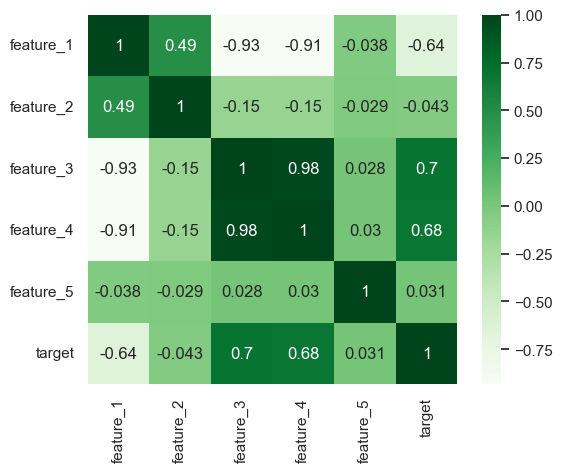

In [37]:
import seaborn as sns

sns.set()
sns.heatmap(df_data.corr(), square=True, annot=True, cmap='Greens')

df_data.corr()

#### Tras observar el mapa de calor se ha decido eliminar las columnas feature_4 y feature_5 ya que tienen una correlación muy baja con la variable objetivo.

#### 4. Parametrización de los datos

In [38]:
# Dividiremos el df_data en un conjunto de datos de test y entrenamiento
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.33

X = df_data[['feature_1', 'feature_2', 'feature_3']]
# si cogemos feature_1, feature_3 y feature_5, el resultado es 0.62 de precisión
y = df_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

#### 5. Creación de los modelos
##### 5.1. Naive Bayes

In [39]:
# calcular la precisión del modelo
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['feature_1', 'feature_2', 'feature_3']))

acc = accuracy_score(y_test, y_pred)
acc

              precision    recall  f1-score   support

   feature_1       0.84      0.83      0.84       114
   feature_2       0.79      0.88      0.83       100
   feature_3       0.86      0.78      0.81       116

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



0.8272727272727273

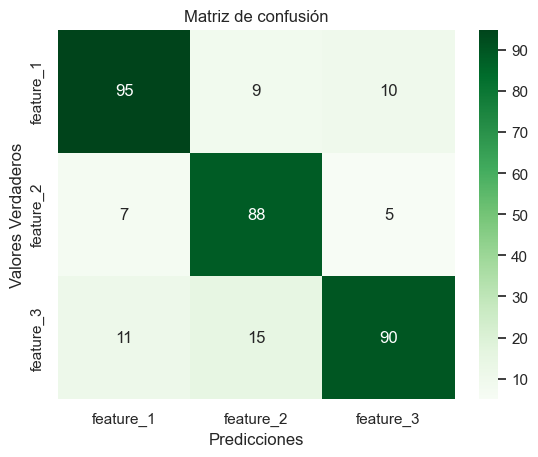

In [40]:
# matriz de confusión de naive bayes

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
classes = ['feature_1', 'feature_2', 'feature_3'] 

sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=classes, yticklabels=classes, fmt='d')

plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

##### 5.2. KNN

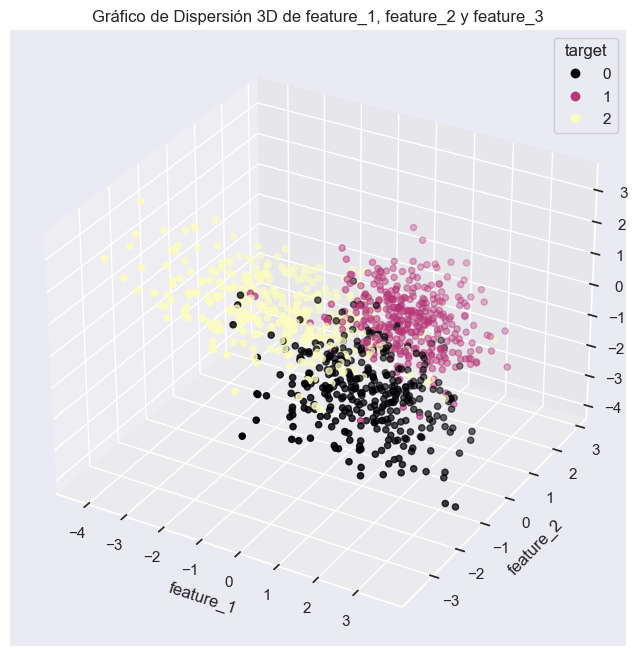

In [41]:
# Visualización de los datos para la elección del método de clasificación
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de dispersión 3D
scatter = ax.scatter(df_data['feature_1'], df_data['feature_2'], df_data['feature_3'], c=df_data['target'], cmap='magma')

# Configuración de etiquetas y título
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax.set_zlabel('feature_3')
plt.title('Gráfico de Dispersión 3D de feature_1, feature_2 y feature_3')

# Leyenda basada en el color de las clases
legend = ax.legend(*scatter.legend_elements(), title='target')
ax.add_artist(legend)

# Mostrar el gráfico
plt.show()

Max Value uniform : 0.8447761194029851 (29)
Max Value distance : 0.8402985074626865 (27)


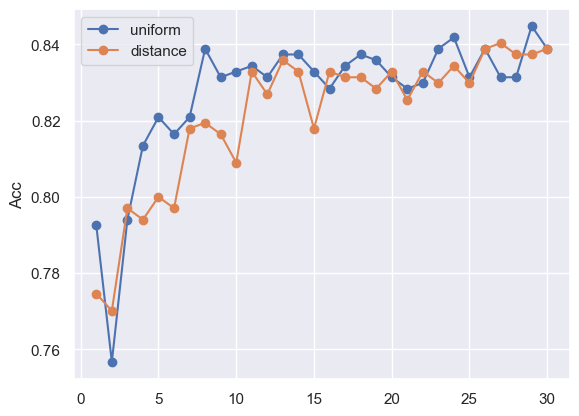

In [42]:
# si quiero saber la distribución de los datos, como puedo poner los 11 atributos en un gráfico? scatter preguntar a rafa

from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np


MIN_NEIGHBORDS = 1
MAX_NEIGHBORDS = 30
N_SPLITS = 5

cv = KFold(N_SPLITS, shuffle=True)
train = pd.concat([X_train, y_train], axis=1)

for i, weights in enumerate(['uniform', 'distance']): 
    total_scores = []
    
    for n_neighbors in range(MIN_NEIGHBORDS, MAX_NEIGHBORDS+1):
        fold_accuracy = []
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        
        for train_fold, test_fold in cv.split(train):
            # División train test aleatoria
            f_train = train.iloc[train_fold]
            f_test = train.iloc[test_fold]
            
            # Entrenamiento y ejecución del modelo
            knn.fit(X=f_train.drop(['target'], axis=1), y=f_train['target'])
            y_pred = knn.predict(X=f_test.drop(['target'], axis=1))
            
            # Evaluación del modelo
            acc = accuracy_score(f_test['target'], y_pred)
            fold_accuracy.append(acc)
            
        total_scores.append(sum(fold_accuracy) / len(fold_accuracy))
        
    plt.plot(range(1, len(total_scores) + 1), total_scores, marker='o', label=weights)
    
    print('Max Value ' + weights + " : " + str(max(total_scores)) + " (" + str(np.argmax(total_scores) + 1) + ")")
    
plt.ylabel('Acc')
plt.legend()
plt.show()

In [43]:
# Seleccionamos la mejor parametrización obtenida
N_NEIGHBORS = 7
WEIGHTS = 'uniform'
knn = neighbors.KNeighborsClassifier(n_neighbors = N_NEIGHBORS, weights = WEIGHTS)

# fit and predict
knn.fit(X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)
acc = accuracy_score(y_test, y_pred)
print('Acc', acc)

Acc 0.8272727272727273


##### Matriz de confusión knn

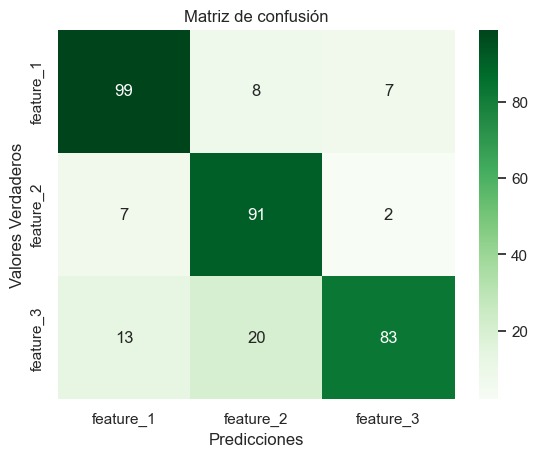

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
classes = ['feature_1', 'feature_2', 'feature_3'] 

sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=classes, yticklabels=classes, fmt='d')

plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()